***Uploading the file to colab***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


***Importing Libraries along with creating a dataframe***


In [3]:
import pandas as pd
import tensorflow as tf
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


***Dropping the month and day column from the dataframe***

In [4]:
df.drop(columns=["month","day"],inplace=True)

***Assigning small as 0 and large as 1 in the size category***

In [5]:
df.loc[df["size_category"]=="small","size_category"]=0
df.loc[df["size_category"]=="large","size_category"]=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [6]:
# split into input (X) and output (Y) variables
X = df.iloc[:,0:28]
X.shape
Y = df.iloc[:,28]
print(X)
print(Y)

     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         

***Converting the dataset to a single data type to avoid errors***

In [7]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float64)
Y_tensor = tf.convert_to_tensor(Y, dtype=tf.float64)

In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

***First model***

In [9]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(units=64,activation='relu')) #Hidden layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = model.fit(X_tensor, Y_tensor, validation_split=0.30, epochs=500, batch_size=200)

Epoch 1/500
2/2 [==============================] - 1s 256ms/step - loss: 11.7681 - accuracy: 0.3490 - val_loss: 4.0295 - val_accuracy: 0.6731
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 2.9016 - accuracy: 0.7119 - val_loss: 8.6083 - val_accuracy: 0.6795
Epoch 3/500
2/2 [==============================] - 0s 56ms/step - loss: 5.1729 - accuracy: 0.7590 - val_loss: 9.7023 - val_accuracy: 0.6795
Epoch 4/500
2/2 [==============================] - 0s 57ms/step - loss: 5.6573 - accuracy: 0.7590 - val_loss: 8.8601 - val_accuracy: 0.6795
Epoch 5/500
2/2 [==============================] - 0s 56ms/step - loss: 4.9004 - accuracy: 0.7590 - val_loss: 6.6540 - val_accuracy: 0.6795
Epoch 6/500
2/2 [==============================] - 0s 55ms/step - loss: 3.1959 - accuracy: 0.7590 - val_loss: 3.5844 - val_accuracy: 0.6923
Epoch 7/500
2/2 [==============================] - 0s 62ms/step - loss: 1.5470 - accuracy: 0.6593 - val_loss: 1.5852 - val_accuracy: 0.6410
Epoch 8/500
2/2 [=

***Accuracy Score***

In [12]:
scores = model.evaluate(X_tensor, Y_tensor)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9768
accuracy: 97.68%


In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

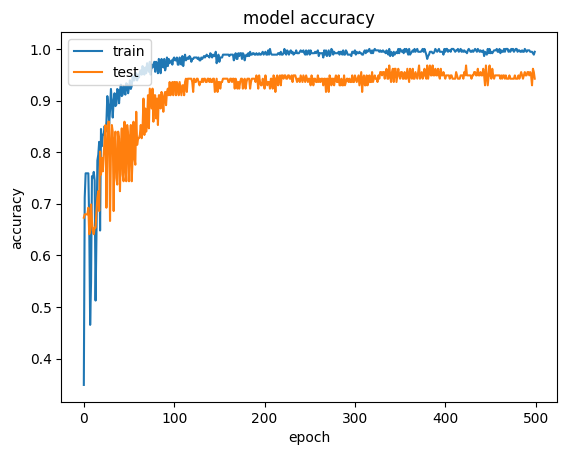

In [14]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***Second model***

In [15]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(units=128,activation='relu')) #Hidden layer
model.add(Dense(units=64,activation='relu')) #Hidden layer
model.add(Dense(1, activation='softmax')) #output layer

In [16]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
history = model.fit(X_tensor, Y_tensor, validation_split=0.30, epochs=500, batch_size=200)

Epoch 1/500
2/2 [==============================] - 1s 200ms/step - loss: 7.7982 - accuracy: 0.2438 - val_loss: 2.8266 - val_accuracy: 0.3269
Epoch 2/500
2/2 [==============================] - 0s 37ms/step - loss: 4.0813 - accuracy: 0.2438 - val_loss: 10.3015 - val_accuracy: 0.3269
Epoch 3/500
2/2 [==============================] - 0s 58ms/step - loss: 7.9108 - accuracy: 0.2438 - val_loss: 13.4211 - val_accuracy: 0.3269
Epoch 4/500
2/2 [==============================] - 0s 53ms/step - loss: 9.0698 - accuracy: 0.2438 - val_loss: 11.2526 - val_accuracy: 0.3269
Epoch 5/500
2/2 [==============================] - 0s 39ms/step - loss: 7.1840 - accuracy: 0.2438 - val_loss: 6.0757 - val_accuracy: 0.3269
Epoch 6/500
2/2 [==============================] - 0s 61ms/step - loss: 2.9789 - accuracy: 0.2438 - val_loss: 0.4189 - val_accuracy: 0.3269
Epoch 7/500
2/2 [==============================] - 0s 63ms/step - loss: 2.6706 - accuracy: 0.2438 - val_loss: 5.8452 - val_accuracy: 0.3269
Epoch 8/500
2/2 

In [18]:
scores = model.evaluate(X_tensor, Y_tensor)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.2689    
accuracy: 26.89%


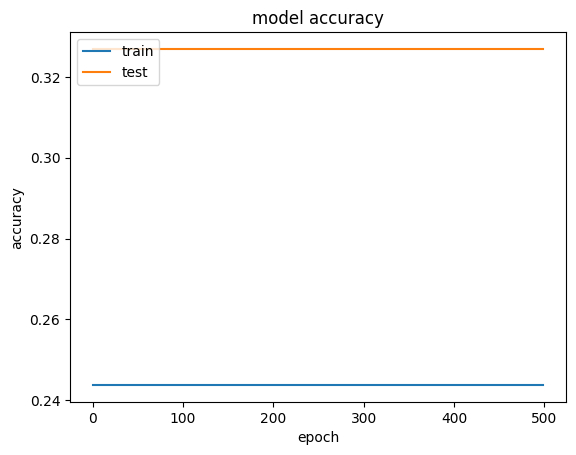

In [19]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**The first model will be preferred based off of accuracy scores**